In [1]:
# Design an 20 ns two-photon transition from |0> to |2> in a transmon qubit.
# The drive is applied at a carrier frequency nu_d = nu_q + α/2, where:
#   - nu_q is the qubit (|0> → |1>) transition frequency,
#   - α is the anharmonicity parameter of the transmon.

# The optimization aims to:
#   - Maximize population transfer from |0> to |2> via a two-photon process,
#   - Minimize leakage to level |3>,
#   - Minimize the total pulse energy, given by the integral ∫ (Ωx² + Ωy²) dt.
# The system is modeled with an anharmonicity of -200 MHz.

# Estimated script runtime: ~15 seconds.

# AUTHOR:
#     Leo Van Damme / Technical University of Munich, 2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Module.parameters import ProblemParameters
from Module.grape import *
from Module.pulse_utils import *
from Module.phys_utils import *

In [3]:
# Problem parameters
p = ProblemParameters(
            alpha=-200e6,           # Anharmonicity parameter in Hz
            QubitFreq=5e9,          # Qubit frequency in Hz
            CarrFreq = 5e9-200e6/2, # Carrier frequency in Hz
            nuRef = 100e6,          # Reference frequency in Hz
            NLevels = 4,            # Number of energy levels
            Nt=200,                 # Number of time steps
            dt=0.1e-9,              # Time step in s.
            Psi0 = [1,0,0,0],       # Initial state: |0>
            Target =[0,0,1,0],      # Target state: |2>
            )

In [4]:
# Initial pulse guess
ux0, uy0 = InitPulse(p,PulseType="RandSymAnt")

Initializing pulse...
Pulse initialized.


In [5]:
# Optimization options
gopt=Grape(
        Maxiter=1000,       # Maximum number of iterations
        EnergyMinimum=True  # Find minimum-energy solution
        )

In [6]:
# Optimize the pulse
ux, uy, J = gopt.Optimize(p,ux0, uy0)

Compiling cost function... Done.
Preoptimization = 10/10, Cost (+ penalty) = -0.000000
########### OPTIMIZATION RESULTS ###########
Cost before optimization: 0.986541461780
Cost after optimization: -0.000000000000
Number of Iterations: 1
Number of iteration during preoptimization: 322


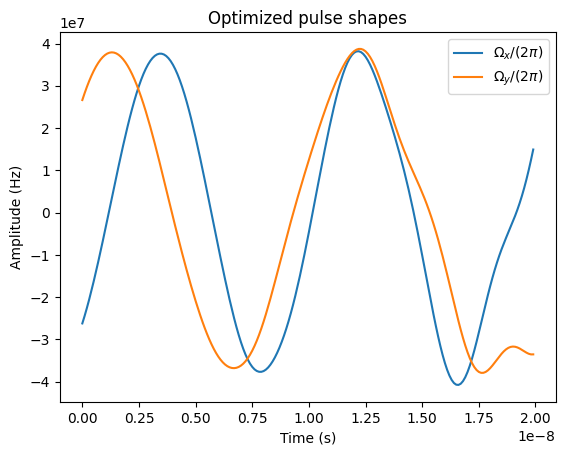

In [7]:
# Display In-phase and quadrature component in Hz
plt.figure()
plt.plot(p.tc,p.nuRef*ux,p.tc,p.nuRef*uy)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Hz)')
plt.legend([r'$\Omega_x/(2\pi)$', r'$\Omega_y/(2\pi)$'])
plt.title("Optimized pulse shapes")
plt.show()

In [8]:
# Compute transition probabilities

# Probability of the transition |0> → |1>
psi_init = EigState(StateIndice='|0>', NLevels=p.NLevels)
psi_meas = EigState(StateIndice='|1>', NLevels=p.NLevels)
P01 = StateProbability(p,ux,uy,InitState=psi_init, MeasState=psi_meas)

# Probability of the transition |0> → |2>
psi_init = EigState(StateIndice='|0>', NLevels=p.NLevels)
psi_meas = EigState(StateIndice='|2>', NLevels=p.NLevels)
P02 = StateProbability(p,ux,uy,InitState=psi_init, MeasState=psi_meas)

# Probability of the transition |0> → |3> (leakage)
psi_init = EigState(StateIndice='|0>', NLevels=p.NLevels)
psi_meas = EigState(StateIndice='|3>', NLevels=p.NLevels)
P03 = StateProbability(p,ux,uy,InitState=psi_init, MeasState=psi_meas)

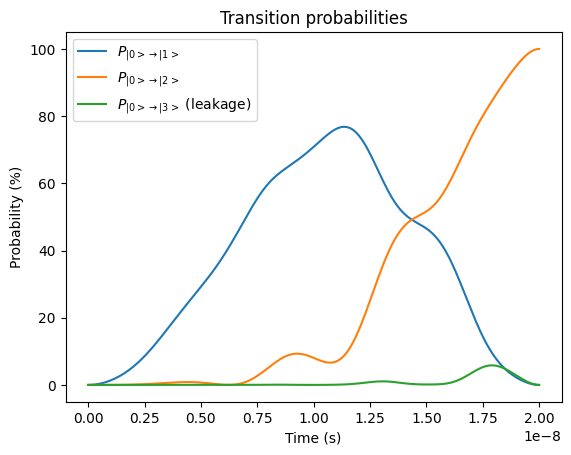

In [9]:
# Display probabilities
plt.figure()
plt.plot(p.t,P01*100)
plt.plot(p.t,P02*100)
plt.plot(p.t,P03*100)
plt.xlabel('Time (s)')
plt.ylabel('Probability (%)')
plt.legend([r'$P_{|0>\rightarrow |1>}$', r'$P_{|0>\rightarrow |2>}$',
            r'$P_{|0>\rightarrow |3>}$ (leakage)'])
plt.title("Transition probabilities")
plt.show()
